In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('insurance_fraud.csv')
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


In [3]:
df.shape

(1000, 40)

In [4]:
df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [6]:
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [7]:
for column in df.columns:
    if df[column].dtype==object:
        print(str(column) + ':' + str(df[column].unique()))
        print(df[column].value_counts())
        print('_____________________________________________')

policy_bind_date:['17-10-2014' '27-06-2006' '06-09-2000' '25-05-1990' '06-06-2014'
 '12-10-2006' '04-06-2000' '03-02-1990' '05-02-1997' '25-07-2011'
 '26-05-2002' '29-05-1999' '20-11-1997' '26-10-2012' '28-12-1998'
 '19-10-1992' '08-06-2005' '15-11-2004' '28-12-2014' '02-08-1992'
 '25-06-2002' '27-11-2005' '27-05-1994' '08-02-1991' '02-02-1996'
 '05-12-2013' '20-09-1990' '18-07-2002' '08-02-1990' '04-03-2014'
 '18-02-2000' '19-06-2008' '01-08-2003' '04-04-1992' '13-01-1991'
 '08-08-2010' '09-03-2003' '03-02-1993' '25-11-2002' '27-07-1997'
 '08-05-1995' '30-08-2012' '30-04-2006' '13-04-2003' '05-12-2007'
 '21-08-2006' '08-01-1990' '18-03-1990' '07-01-2008' '10-03-1997'
 '10-01-2004' '20-08-1994' '02-06-2002' '28-04-1994' '17-08-2014'
 '11-08-2007' '20-11-2008' '18-10-1995' '19-05-1993' '26-02-2005'
 '14-02-1990' '30-09-1993' '10-06-2014' '28-10-2008' '24-04-2007'
 '13-12-1993' '17-08-2011' '20-08-1990' '11-02-1994' '22-02-1994'
 '15-08-2011' '11-11-1998' '04-12-1995' '28-12-2002' '15-04

In [8]:
df.drop('_c39',axis=1, inplace=True)
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,1,?,87200,17440,8720,61040,Honda,Accord,2006,N
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,3,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,1,YES,46980,5220,5220,36540,Audi,A5,1998,N


In [9]:
df['policy_bind_date']=pd.to_datetime(df['policy_bind_date'])
df['policy_bind_date'].dtype

dtype('<M8[ns]')

In [10]:
from sklearn.preprocessing import LabelEncoder
for column in df.columns:
    if df[column].dtype==np.number:
        continue
    df[column]=LabelEncoder().fit_transform(df[column])

In [11]:
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,299,29,480,941,2,1,1,1406.91,1,486,...,2,2,563,258,512,545,10,1,9,1
1,212,23,257,639,1,1,2,1197.22,5,519,...,0,0,44,46,45,38,8,12,12,1
2,123,10,672,405,2,0,2,1413.14,5,6,...,3,1,143,337,104,116,4,30,12,0
3,239,22,140,19,0,1,2,1415.74,6,812,...,2,1,451,245,249,521,3,34,19,1
4,212,25,286,926,0,2,1,1583.91,6,850,...,1,1,81,70,36,66,0,31,14,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,19,935,70,2,2,1,1310.80,1,19,...,1,0,705,624,379,664,6,6,11,0
996,266,22,101,919,0,0,1,1436.79,1,813,...,3,0,760,630,608,714,13,28,20,0
997,119,15,902,514,2,1,0,1383.49,3,181,...,3,2,507,324,330,554,11,19,1,0
998,377,43,500,832,0,2,2,1356.92,5,157,...,1,2,224,168,170,256,1,5,3,0


<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

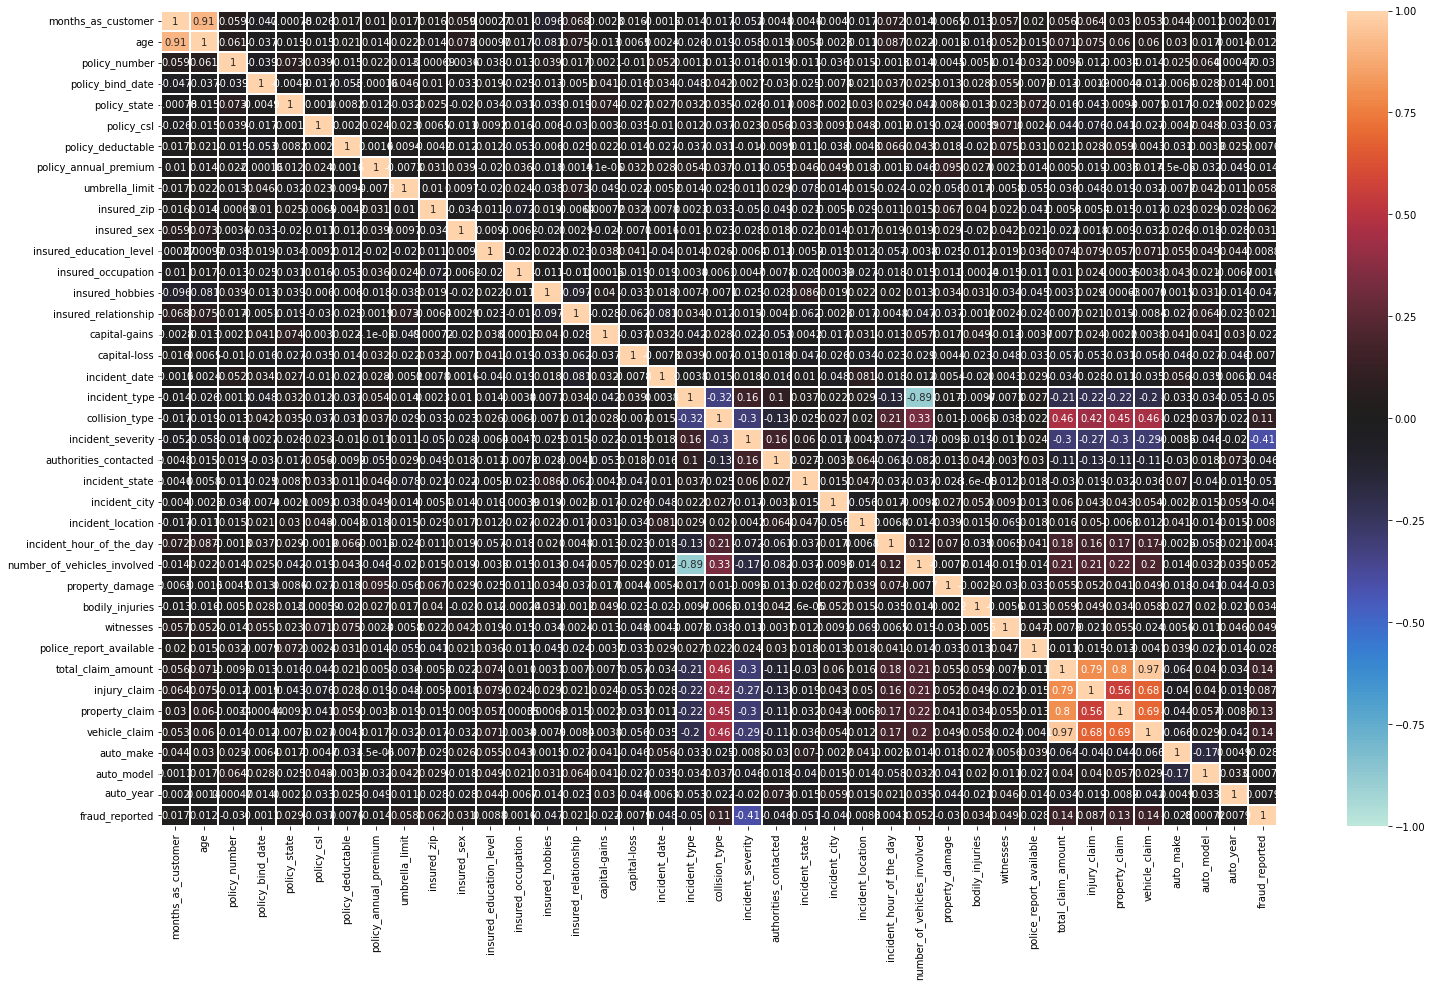

In [12]:
df_corr=df.corr()
plt.figure(figsize=(25,15))
sns.heatmap(df_corr,vmin=-1,vmax=1,annot=True,center=0,fmt='.2g',linewidth=0.1)
plt.tight_layout

In [13]:
df.corr()['fraud_reported'].sort_values()

incident_severity             -0.405988
incident_state                -0.051407
incident_type                 -0.050376
incident_date                 -0.047726
insured_hobbies               -0.046838
authorities_contacted         -0.045802
incident_city                 -0.040403
policy_csl                    -0.037190
property_damage               -0.030497
policy_number                 -0.030222
police_report_available       -0.028159
auto_make                     -0.027519
capital-gains                 -0.021636
policy_annual_premium         -0.014480
incident_location             -0.008832
capital-loss                  -0.007930
policy_bind_date              -0.001139
auto_model                     0.000720
insured_occupation             0.001564
incident_hour_of_the_day       0.004316
policy_deductable              0.007620
auto_year                      0.007928
insured_education_level        0.008808
age                            0.012143
months_as_customer             0.017095


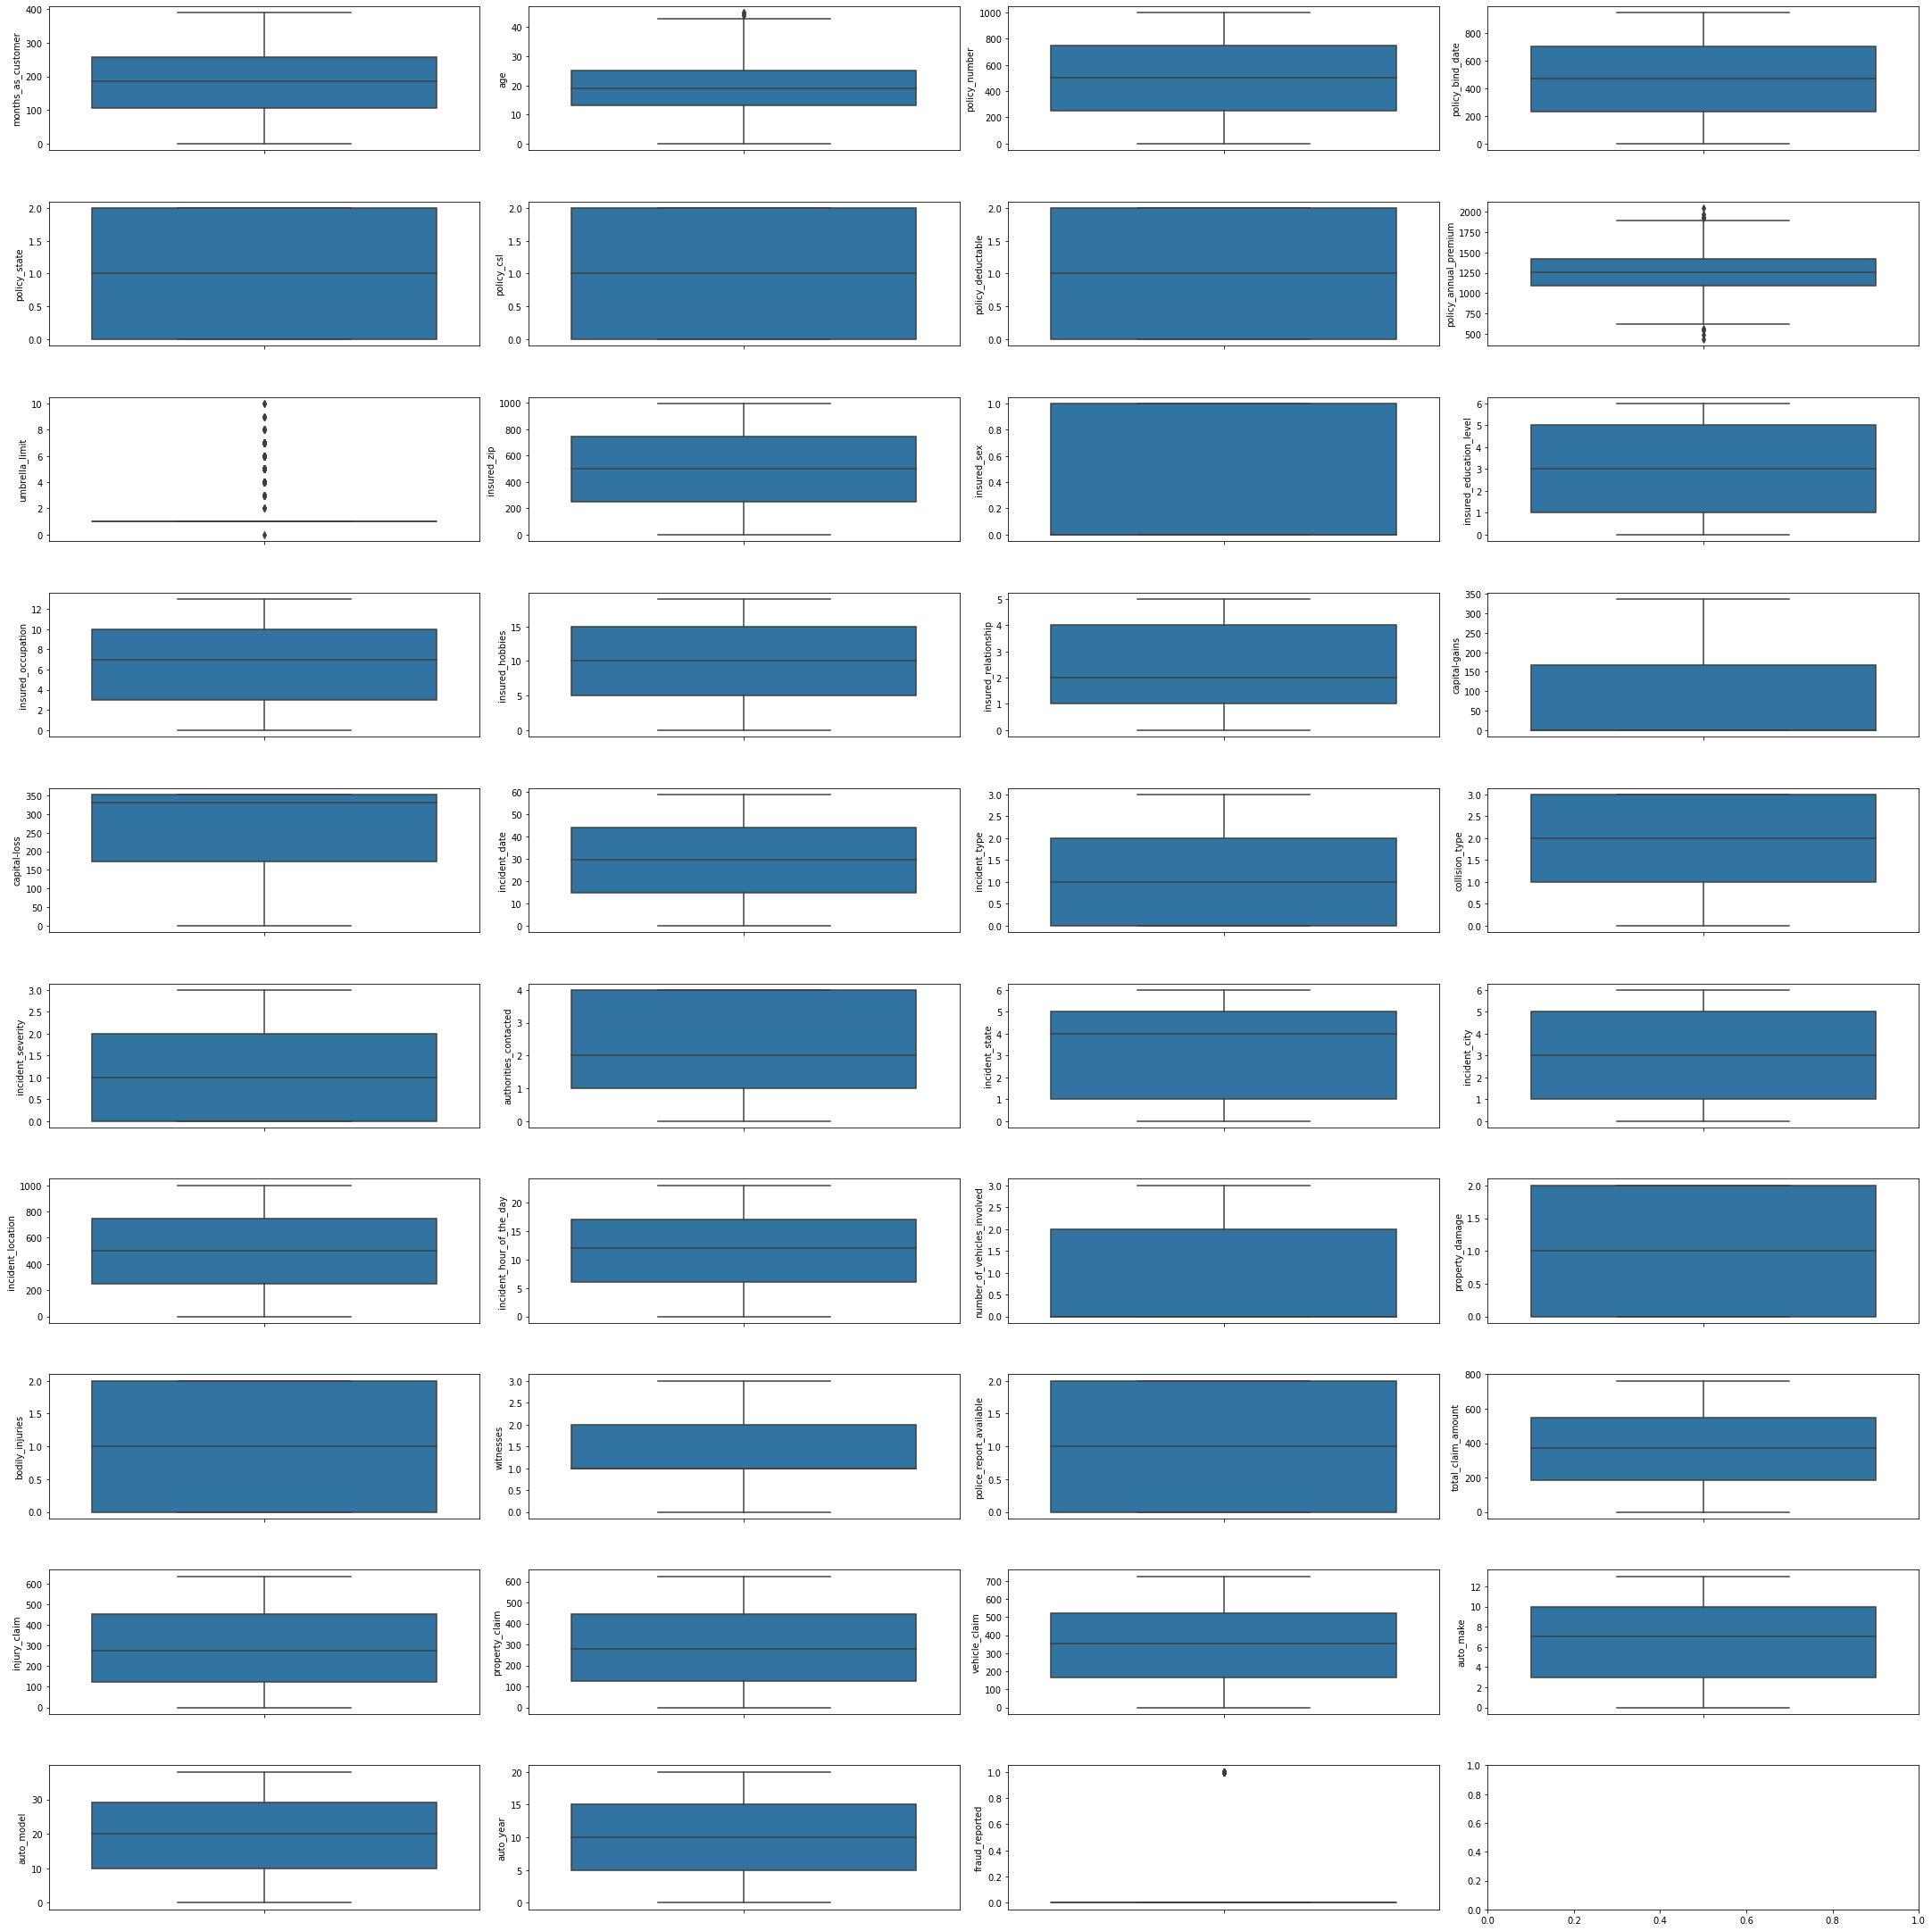

In [19]:
fig, ax = plt.subplots(ncols=4,nrows=10,figsize=(30,30))
index=0
ax=ax.flatten()
for col,value in df.items():
    sns.boxplot(y=col, data=df, ax=ax[index])
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

In [20]:
x=df.drop('fraud_reported',axis=1)
y=df['fraud_reported']

In [34]:
y.value_counts()

0    753
1    247
Name: fraud_reported, dtype: int64

In [35]:
from imblearn.over_sampling import SMOTE
oversample=SMOTE()
x,y=oversample.fit_resample(x,y)

In [36]:
y.value_counts()

1    753
0    753
Name: fraud_reported, dtype: int64

In [37]:
from sklearn.preprocessing import StandardScaler

In [38]:
scaler=StandardScaler()
x=scaler.fit_transform(x)

In [39]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [40]:
from sklearn.ensemble import RandomForestClassifier
f=RandomForestClassifier(n_estimators=20, criterion='entropy',random_state=42)
f.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=20, random_state=42)

In [41]:
f.score(x_train,y_train)

1.0

In [42]:
from sklearn.metrics import confusion_matrix
m=confusion_matrix(y_test,f.predict(x_test))
TN=m[0][0]
TP=m[1][1]
FN=m[1][0]
FP=m[0][1]
print(m)
print('Accuracy = {}'.format((TP+TN)/(TP+TN+FP+FN)))

[[127  15]
 [ 23 137]]
Accuracy = 0.8741721854304636


0.6525968309859155

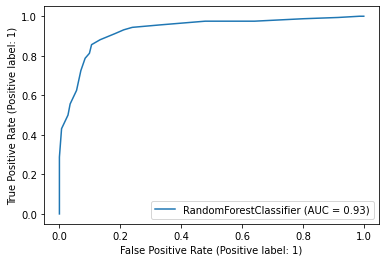

In [72]:
metrics.plot_roc_curve(f, x_test, y_test)
metrics.roc_auc_score(y_test, y_pred, average=None) 

In [43]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression(max_iter=10000)
lg.fit(x_train,y_train)

LogisticRegression(max_iter=10000)

In [44]:
lg.score(x_train,y_train)

0.7657807308970099

In [45]:
cm=confusion_matrix(y_test,lg.predict(x_test))
TN=cm[0][0]
TP=cm[1][1]
FN=cm[1][0]
FP=cm[0][1]
print(cm)
print('Accuracy = {}'.format((TP+TN)/(TP+TN+FP+FN)))

[[ 98  44]
 [ 38 122]]
Accuracy = 0.7284768211920529


0.6525968309859155

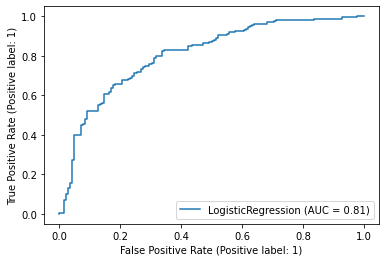

In [71]:
metrics.plot_roc_curve(lg, x_test, y_test)
metrics.roc_auc_score(y_test, y_pred, average=None) 

In [46]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier(criterion='entropy')
dtc.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [47]:
dtc.score(x_train,y_train)

1.0

In [48]:
dcm=confusion_matrix(y_test,dtc.predict(x_test))
TN=dcm[0][0]
TP=dcm[1][1]
FN=dcm[1][0]
FP=dcm[0][1]
print(dcm)
print('Accuracy = {}'.format((TP+TN)/(TP+TN+FP+FN)))

[[113  29]
 [ 23 137]]
Accuracy = 0.8278145695364238


0.6525968309859155

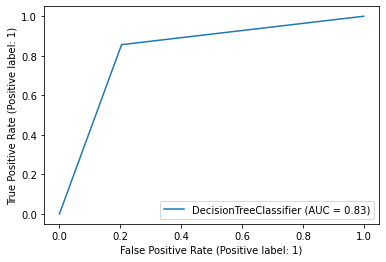

In [73]:
metrics.plot_roc_curve(dtc, x_test, y_test)
metrics.roc_auc_score(y_test, y_pred, average=None) 

In [59]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [53]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [56]:
y_pred = knn.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[ 46  96]
 [  3 157]]
0.6721854304635762
              precision    recall  f1-score   support

           0       0.94      0.32      0.48       142
           1       0.62      0.98      0.76       160

    accuracy                           0.67       302
   macro avg       0.78      0.65      0.62       302
weighted avg       0.77      0.67      0.63       302



0.6525968309859155

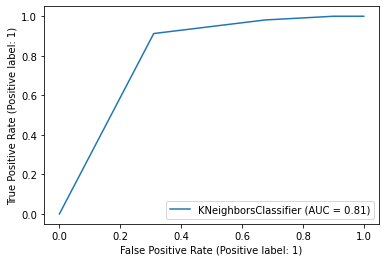

In [60]:
metrics.plot_roc_curve(knn, x_test, y_test)
metrics.roc_auc_score(y_test, y_pred, average=None) 

In [62]:
gnb = GaussianNB()
gnb.fit(x_train, y_train)

GaussianNB()

In [66]:
y_predg = gnb.predict(x_test)
print(confusion_matrix(y_test,y_predg))
print(accuracy_score(y_test,y_predg))
print(classification_report(y_test,y_predg))

[[ 92  50]
 [ 21 139]]
0.7649006622516556
              precision    recall  f1-score   support

           0       0.81      0.65      0.72       142
           1       0.74      0.87      0.80       160

    accuracy                           0.76       302
   macro avg       0.77      0.76      0.76       302
weighted avg       0.77      0.76      0.76       302



0.758318661971831

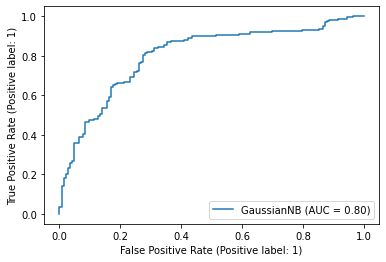

In [67]:
metrics.plot_roc_curve(gnb, x_test, y_test)
metrics.roc_auc_score(y_test, y_predg, average=None) 

In [68]:
svc = SVC()
svc.fit(x_train, y_train)

SVC()

In [69]:
y_preds = svc.predict(x_test)
print(confusion_matrix(y_test,y_preds))
print(accuracy_score(y_test,y_preds))
print(classification_report(y_test,y_preds))

[[120  22]
 [ 13 147]]
0.8841059602649006
              precision    recall  f1-score   support

           0       0.90      0.85      0.87       142
           1       0.87      0.92      0.89       160

    accuracy                           0.88       302
   macro avg       0.89      0.88      0.88       302
weighted avg       0.89      0.88      0.88       302



0.8819102112676056

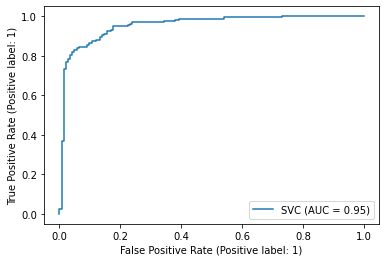

In [70]:
metrics.plot_roc_curve(svc, x_test, y_test)
metrics.roc_auc_score(y_test, y_preds, average=None) 


In [74]:
import pickle
filename='insurance_fraud.pkl'
pickle.dump(svc,open(filename,'wb'))